# Лабораториска Вежба 1
# Класификација со Naïve Bayes и Gaussian Discriminant Analysis модели (LDA и QDA)
Мартин Поповски 186086

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import average_precision_score

## Load dataset

In [2]:
df = pd.read_csv('data/Pokemon.csv')
df

#                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1      False  
1         80       80     60           1      False  
2        100      100     80           1      False  
3        122      120     80           1      False  
4         60       50     65           1      False  
..       ...      ...    ...         ...        ...  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True  

[800 rows x 13 columns]

## Analyze dataset

### Missing values

In [3]:
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

We can see that a lot of Pokemon do not have a second type. We can handle this by just giving this a string representation, in this case "None".

In [4]:
df['Type 2'] = df['Type 2'].fillna('None')

In [5]:
df.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

### Summary of continous features

In [6]:
df.describe()

#      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.000000   65.000000     3.00000  
75%     90.000000   90.000000     5.00000  
max    230.000000  180.000000     6.00000

### Counts of categorical features

In [7]:
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ghost        32
Dragon       32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

<AxesSubplot:xlabel='Type 1', ylabel='count'>

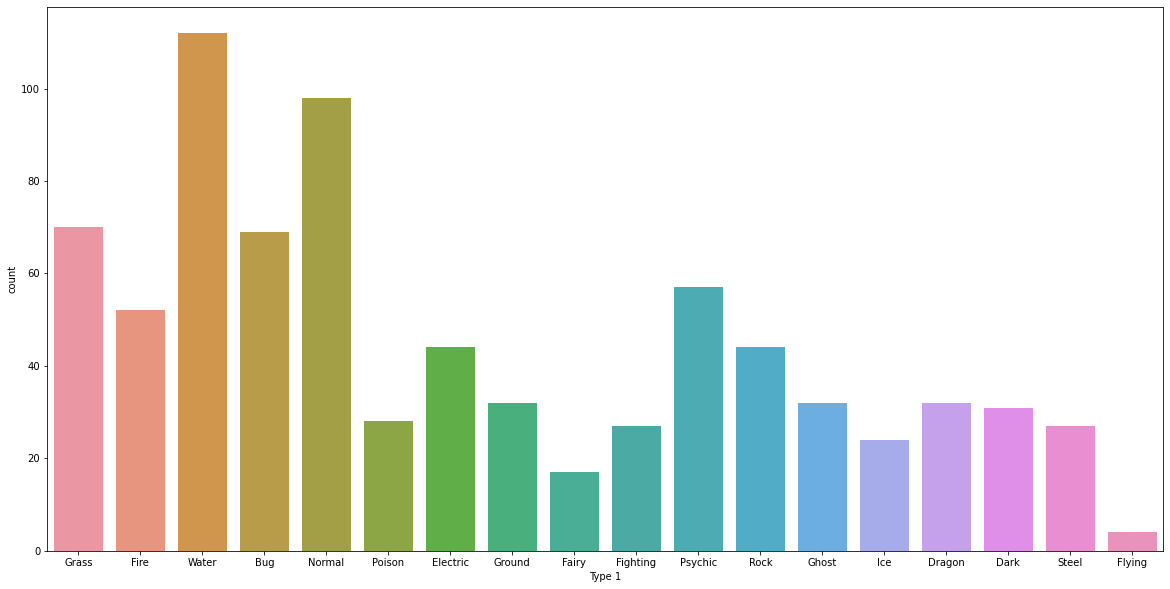

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='Type 1', data=df, ax=ax)

In [9]:
df['Type 2'].value_counts()

None        386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Ghost        14
Water        14
Ice          14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

<AxesSubplot:xlabel='Type 2', ylabel='count'>

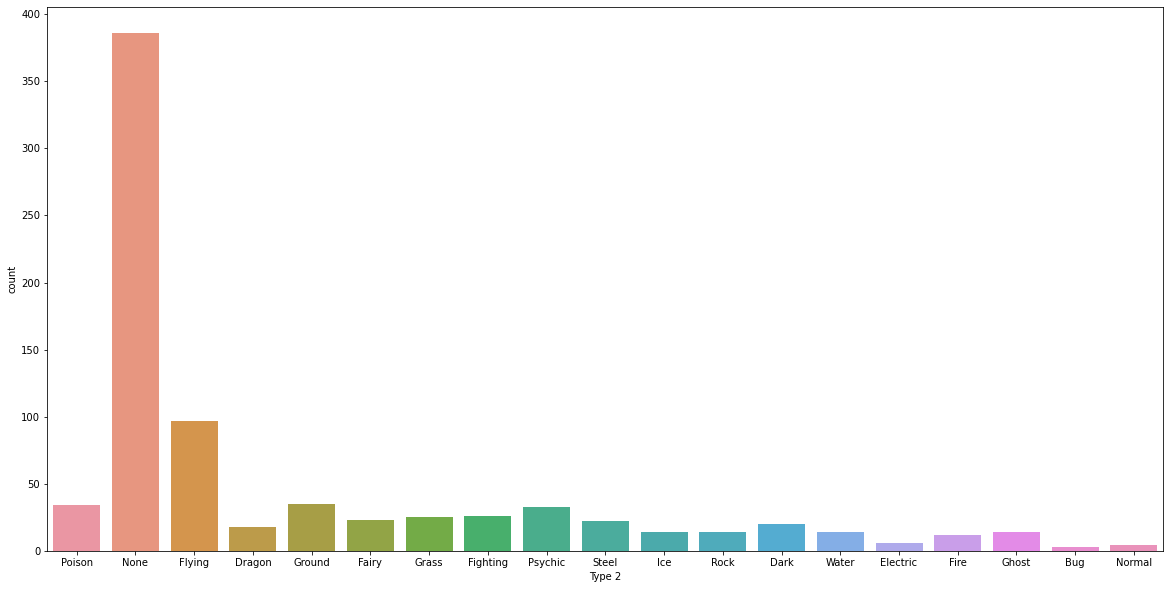

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='Type 2', data=df, ax=ax)

In [11]:
df['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

<AxesSubplot:xlabel='Generation', ylabel='count'>

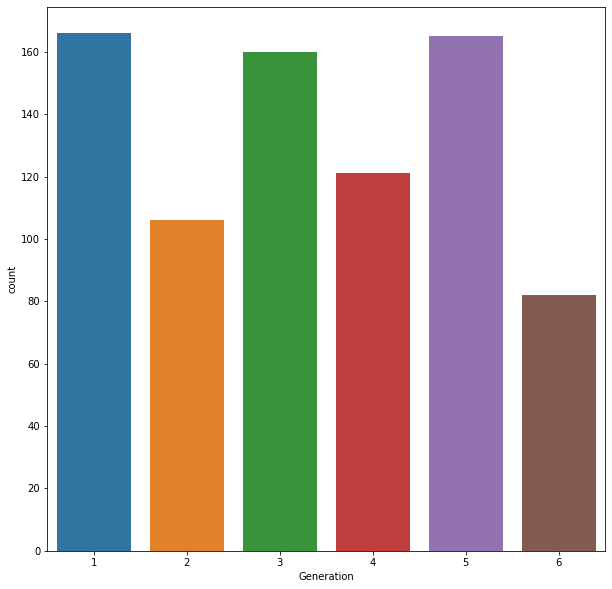

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='Generation', data=df, ax=ax)

In [13]:
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

<AxesSubplot:xlabel='Legendary', ylabel='count'>

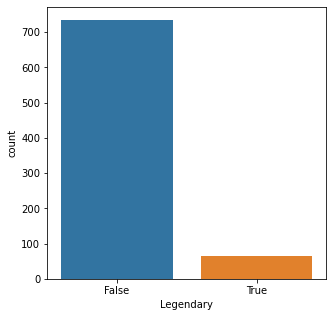

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='Legendary', data=df, ax=ax)

## Visualizations

### Pair plots

It could be argued that Generation is more of a categorical feature rather than a continous, so I won't be using it as a continous feature.

In [15]:
continous_columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

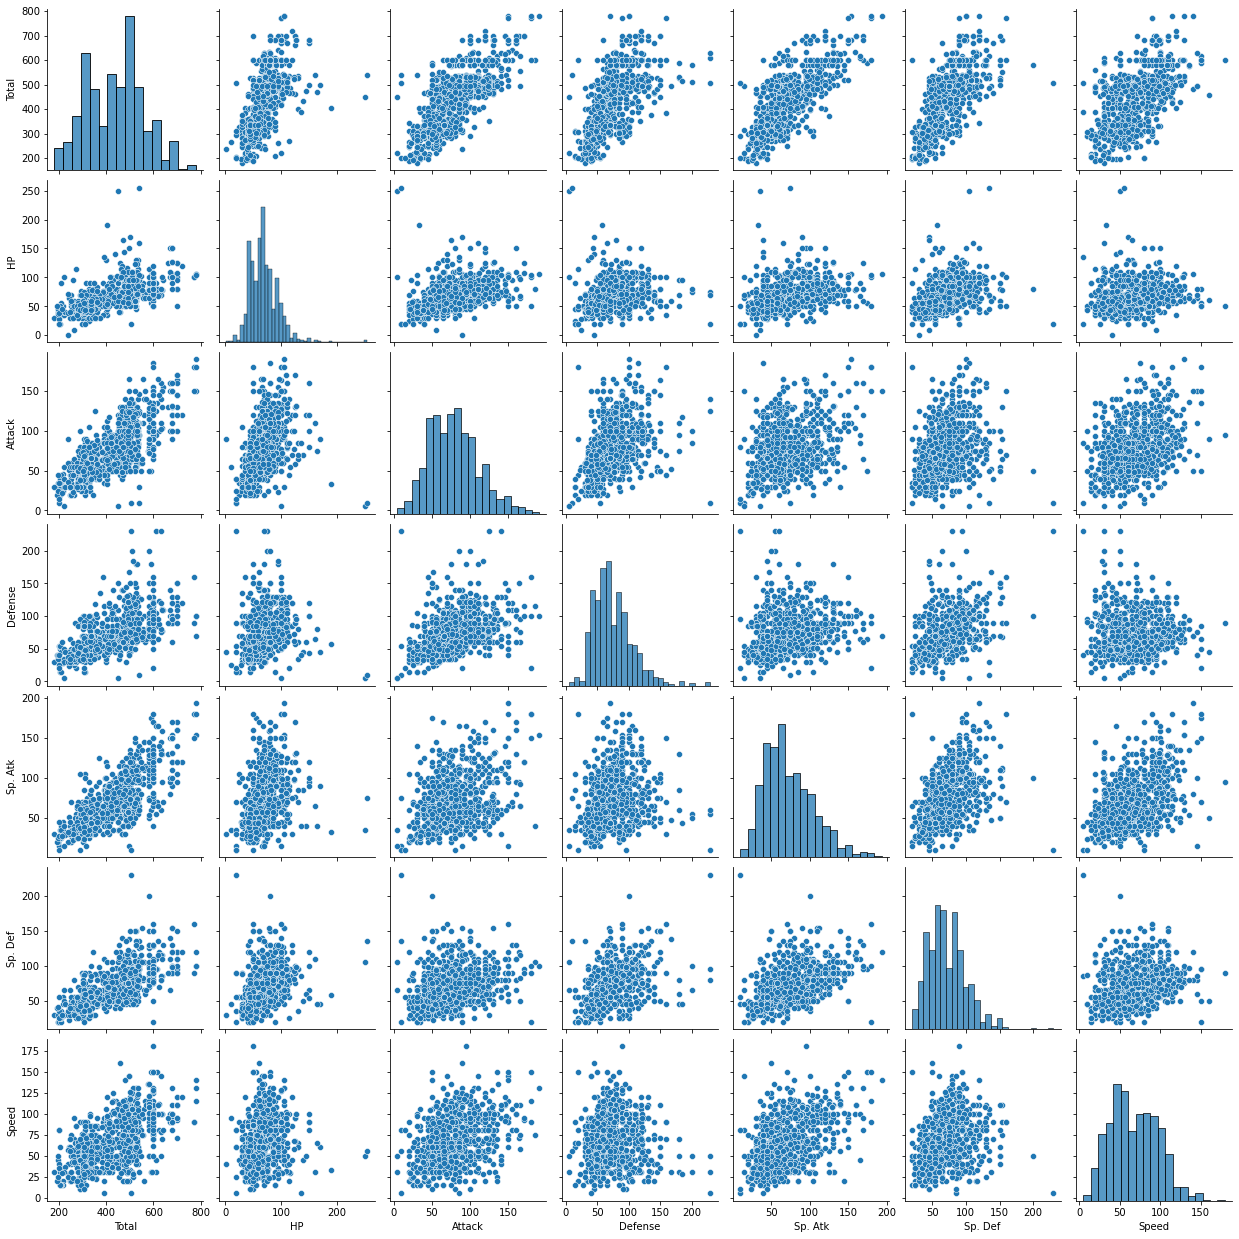

In [16]:
sns.pairplot(data=df[continous_columns])

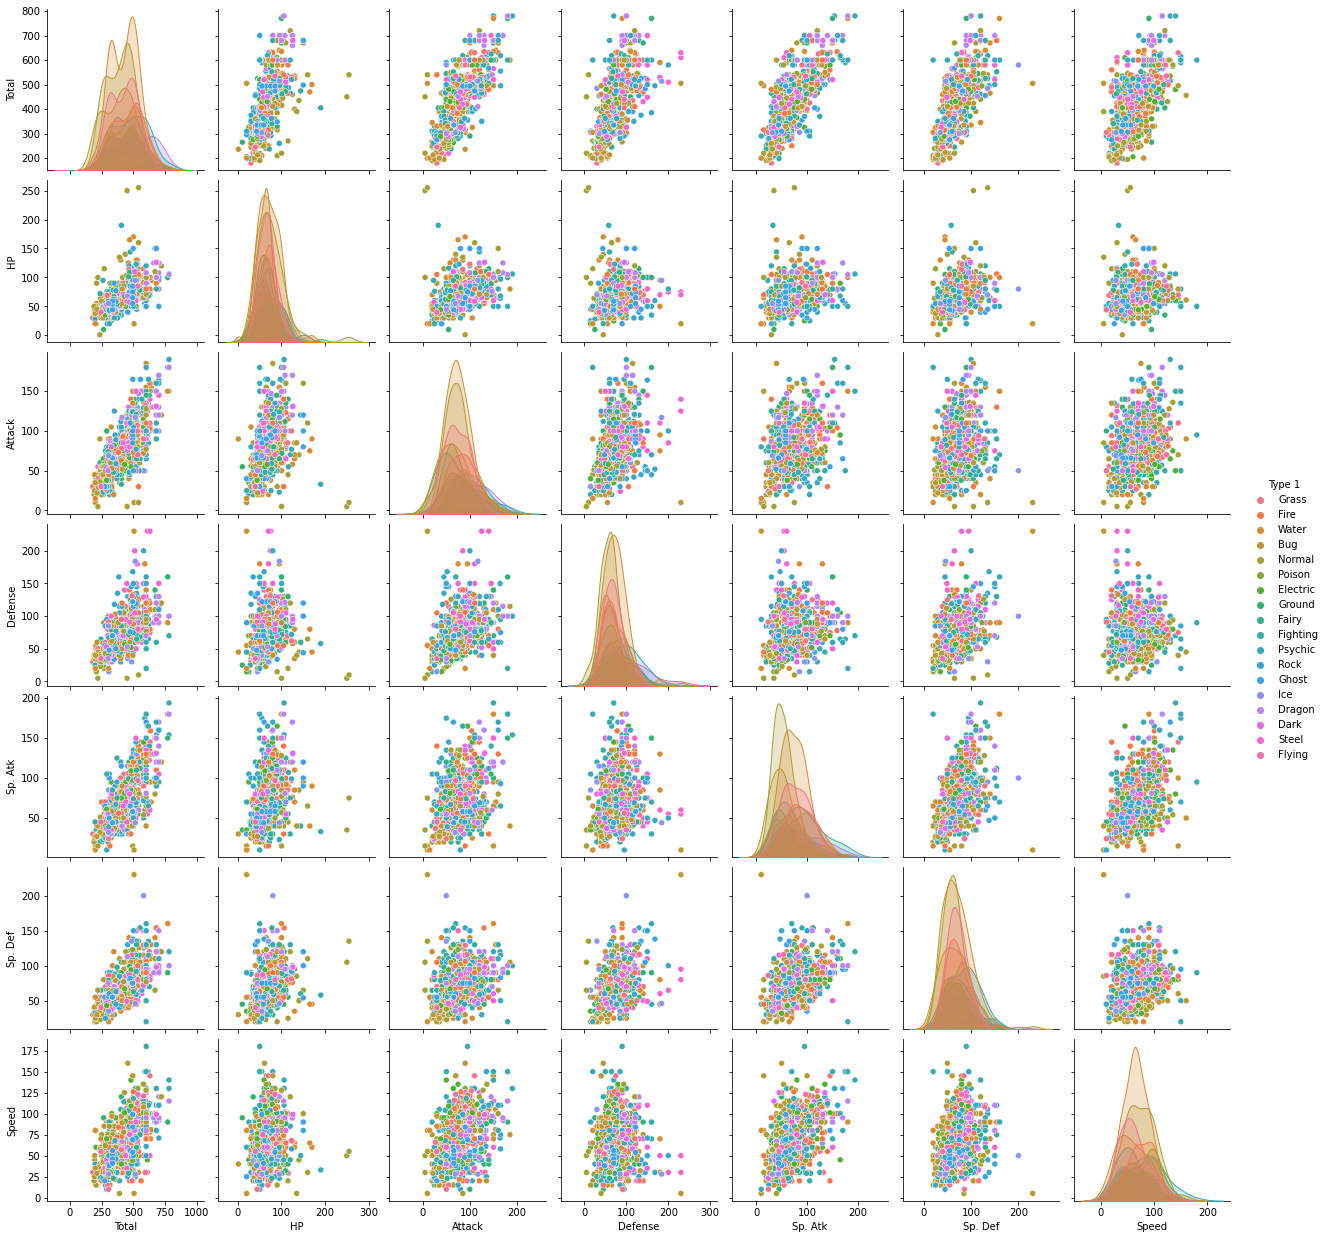

In [17]:
sns.pairplot(data=df[continous_columns + ['Type 1']], hue='Type 1')

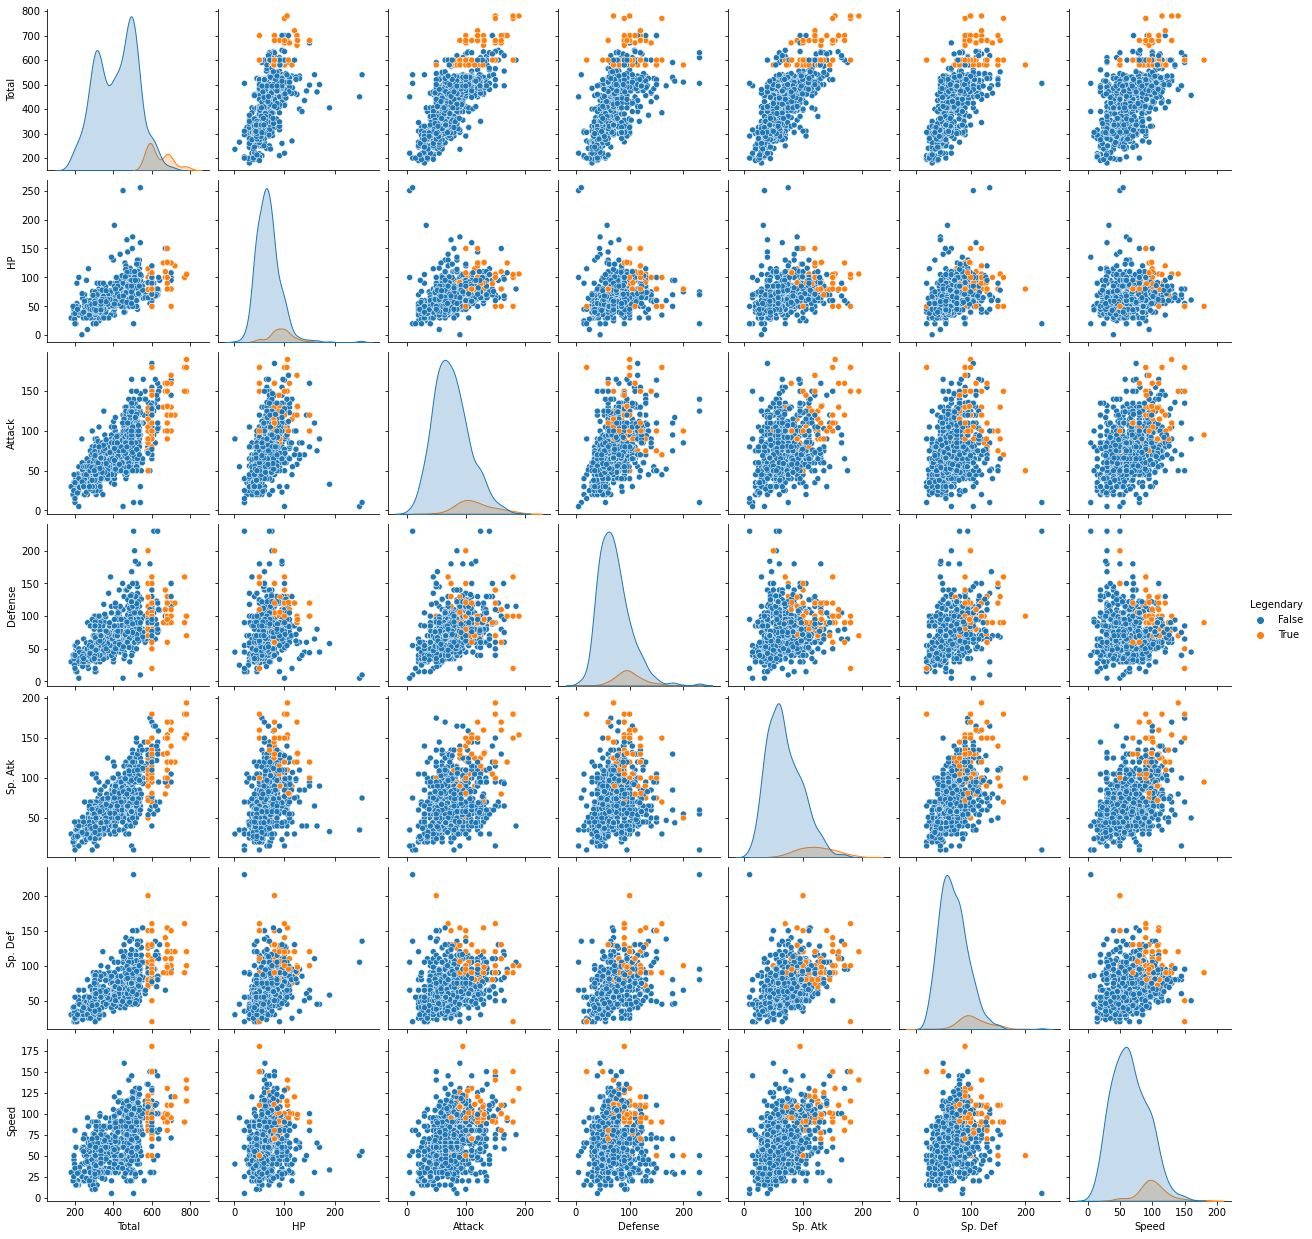

In [18]:
sns.pairplot(data=df[continous_columns + ['Legendary']], hue='Legendary')

From analyzing the pair plots I chose to work with Legendary as the target variable.

### Correlation heat map

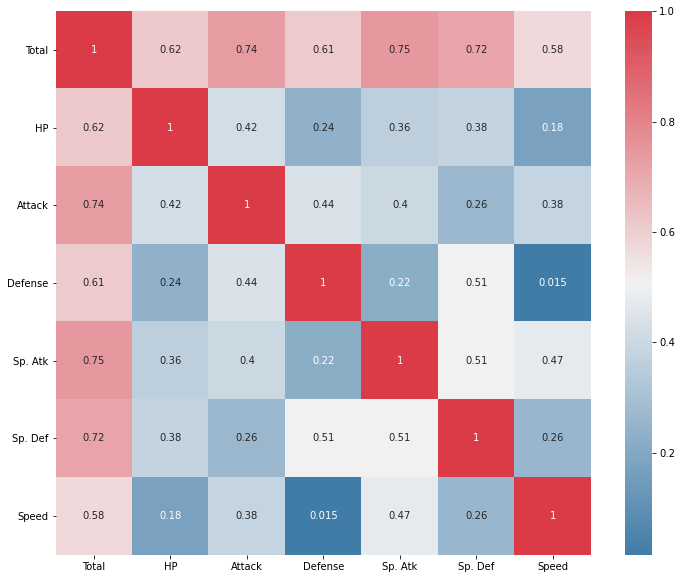

In [19]:
corr = df[continous_columns].corr(method='pearson')
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap = True), ax=ax)
_ = plt.yticks(rotation=0)

### Dimension reduction functions

In [20]:
def get_reduced_df(df_tmp, model, n_components):
    df_reduced = pd.DataFrame()
    x = pca.fit_transform(df_tmp[continous_columns])
    for n in range(n_components):
        df_reduced[f'x{n + 1}'] = x[:,n]
    return df_reduced

In [21]:
def plot_2d(df_reduced, color):
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.scatterplot(x='x1', y='x2', data=df_reduced, hue=color, ax=ax)

In [22]:
def plot_3d(df_reduced, color):
    sns.set(style = "darkgrid")
    fig = plt.figure(figsize=(40, 20))
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(df_reduced['x1'], df_reduced['x2'], df_reduced['x3'], c=color, s=40)

### PCA

x1, x2, x3... correspond to the eigenvectors

#### 2 dimensions

In [23]:
pca = PCA(n_components=2)
df_pca_2 = get_reduced_df(df, pca, 2)
df_pca_2

x1         x2
0   -125.859080  -5.205879
1    -32.129956  -5.765084
2     97.226798  -5.389766
3    206.067079  18.630885
4   -135.909253 -21.589003
..          ...        ...
795  179.901562  67.076725
796  290.416699 -20.950892
797  181.097541 -27.667492
798  269.320318 -37.488657
799  179.995667  14.782227

[800 rows x 2 columns]

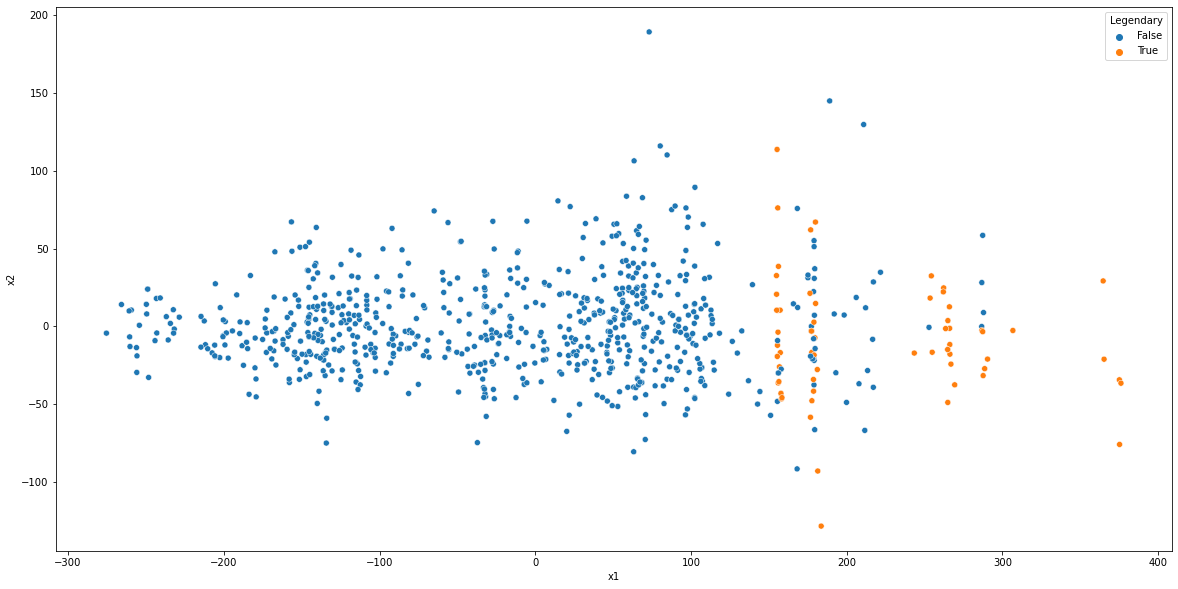

In [24]:
plot_2d(df_pca_2, df['Legendary'])

#### 3 dimensions

In [25]:
pca = PCA(n_components=3)
df_pca_3 = get_reduced_df(df, pca, 3)
df_pca_3

x1         x2         x3
0   -125.859080  -5.205879  19.045828
1    -32.129956  -5.765084  20.865708
2     97.226798  -5.389766  21.389753
3    206.067079  18.630885  28.969078
4   -135.909253 -21.589003   4.078772
..          ...        ...        ...
795  179.901562  67.076725  43.899102
796  290.416699 -20.950892  -9.046572
797  181.097541 -27.667492  36.617614
798  269.320318 -37.488657   6.132534
799  179.995667  14.782227   9.803984

[800 rows x 3 columns]

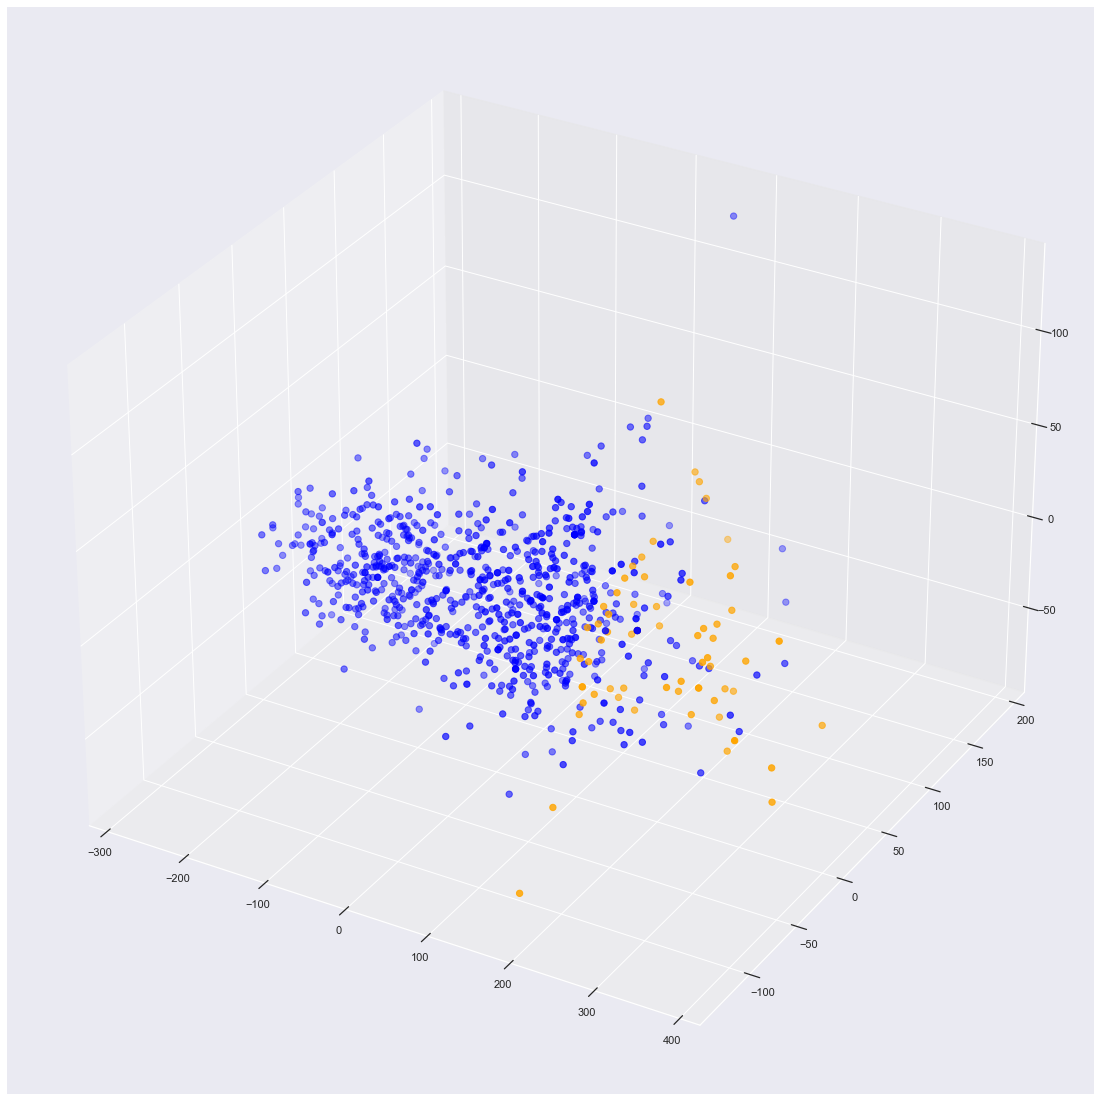

In [26]:
color_map = {True: 'orange', False: 'blue'}
plot_3d(df_pca_3, df['Legendary'].map(color_map))

### LDA

#### 2 dimensions 

In [27]:
lda = LinearDiscriminantAnalysis(n_components=2)
df_lda_2 = get_reduced_df(df, lda, 2)
df_lda_2

x1         x2
0   -125.859080  -5.205879
1    -32.129956  -5.765084
2     97.226798  -5.389766
3    206.067079  18.630885
4   -135.909253 -21.589003
..          ...        ...
795  179.901562  67.076725
796  290.416699 -20.950892
797  181.097541 -27.667492
798  269.320318 -37.488657
799  179.995667  14.782227

[800 rows x 2 columns]

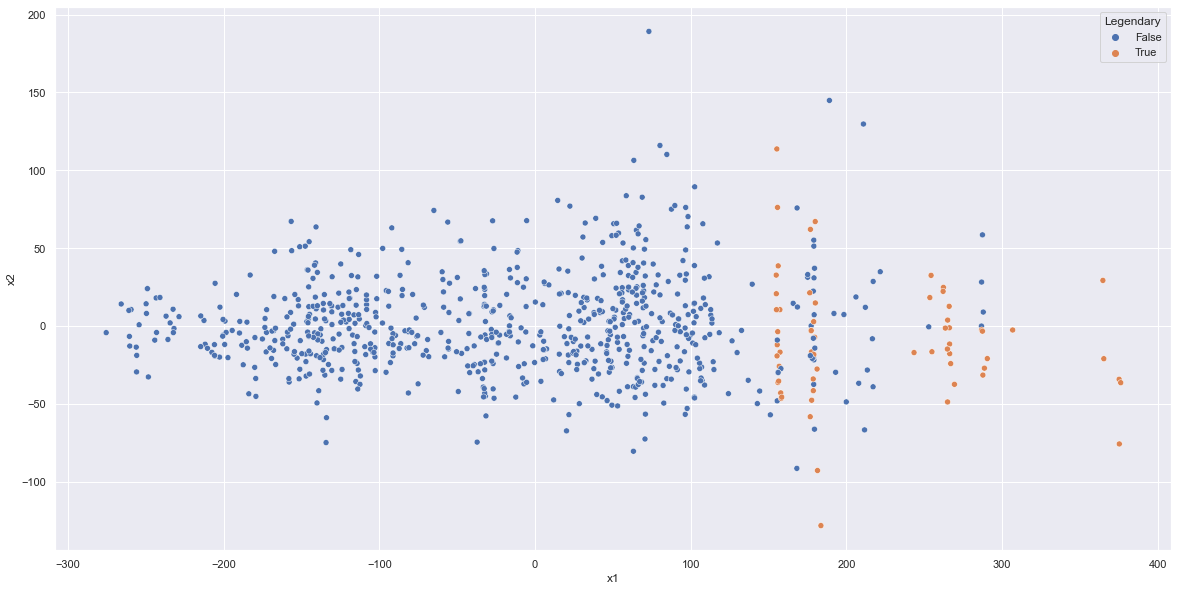

In [28]:
plot_2d(df_lda_2, df['Legendary'])

In [29]:
lda = LinearDiscriminantAnalysis(n_components=3)
df_lda_3 = get_reduced_df(df, lda, 3)
df_lda_3

x1         x2         x3
0   -125.859080  -5.205879  19.045828
1    -32.129956  -5.765084  20.865708
2     97.226798  -5.389766  21.389753
3    206.067079  18.630885  28.969078
4   -135.909253 -21.589003   4.078772
..          ...        ...        ...
795  179.901562  67.076725  43.899102
796  290.416699 -20.950892  -9.046572
797  181.097541 -27.667492  36.617614
798  269.320318 -37.488657   6.132534
799  179.995667  14.782227   9.803984

[800 rows x 3 columns]

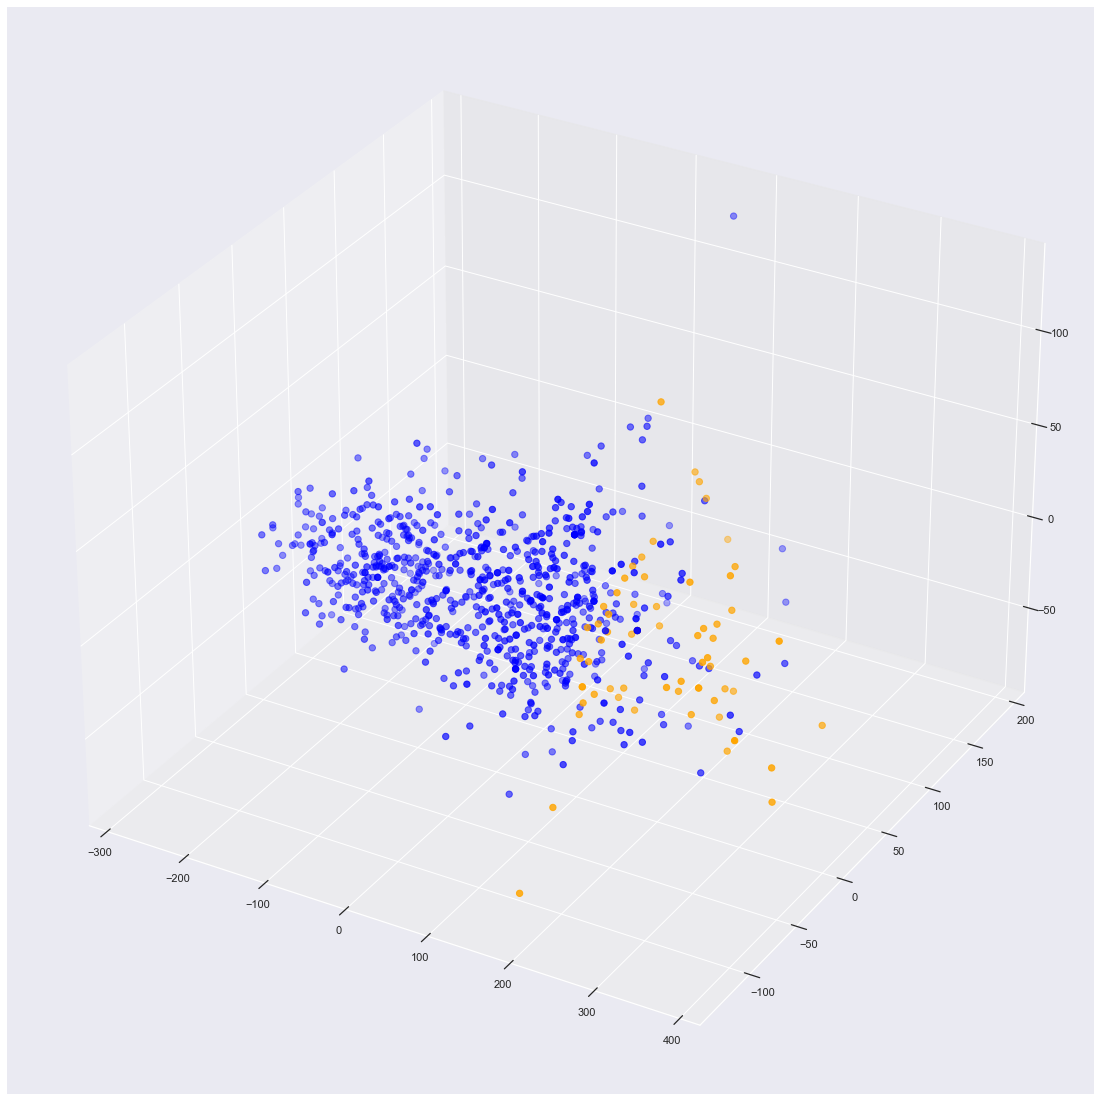

In [30]:
color_map = {True: 'orange', False: 'blue'}
plot_3d(df_lda_3, df['Legendary'].map(color_map))

## Classification

### Preprocessing

In [31]:
X = df.drop(['#', 'Name', 'Legendary'], axis=1).copy()
X

Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0      Grass  Poison    318  45      49       49       65       65     45   
1      Grass  Poison    405  60      62       63       80       80     60   
2      Grass  Poison    525  80      82       83      100      100     80   
3      Grass  Poison    625  80     100      123      122      120     80   
4       Fire    None    309  39      52       43       60       50     65   
..       ...     ...    ...  ..     ...      ...      ...      ...    ...   
795     Rock   Fairy    600  50     100      150      100      150     50   
796     Rock   Fairy    700  50     160      110      160      110    110   
797  Psychic   Ghost    600  80     110       60      150      130     70   
798  Psychic    Dark    680  80     160       60      170      130     80   
799     Fire   Water    600  80     110      120      130       90     70   

     Generation  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
795           6  
796           6  
797           6  
798           6  
799           6  

[800 rows x 10 columns]

In [32]:
le_type_1 = LabelEncoder()
le_type_2 = LabelEncoder()
le_type_1.fit(X['Type 1'])
le_type_2.fit(X['Type 2'])
X['Type 1'] = le_type_1.transform(X['Type 1'])
X['Type 2'] = le_type_2.transform(X['Type 2'])
X

Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0         9      14    318  45      49       49       65       65     45   
1         9      14    405  60      62       63       80       80     60   
2         9      14    525  80      82       83      100      100     80   
3         9      14    625  80     100      123      122      120     80   
4         6      12    309  39      52       43       60       50     65   
..      ...     ...    ...  ..     ...      ...      ...      ...    ...   
795      15       4    600  50     100      150      100      150     50   
796      15       4    700  50     160      110      160      110    110   
797      14       8    600  80     110       60      150      130     70   
798      14       1    680  80     160       60      170      130     80   
799       6      18    600  80     110      120      130       90     70   

     Generation  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
795           6  
796           6  
797           6  
798           6  
799           6  

[800 rows x 10 columns]

In [33]:
y = df['Legendary']
y

0      False
1      False
2      False
3      False
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Legendary, Length: 800, dtype: bool

In [34]:
X_PCA = df_pca_2.copy()
X_PCA

x1         x2
0   -125.859080  -5.205879
1    -32.129956  -5.765084
2     97.226798  -5.389766
3    206.067079  18.630885
4   -135.909253 -21.589003
..          ...        ...
795  179.901562  67.076725
796  290.416699 -20.950892
797  181.097541 -27.667492
798  269.320318 -37.488657
799  179.995667  14.782227

[800 rows x 2 columns]

In [35]:
X_LDA = df_lda_2.copy()
X_LDA

x1         x2
0   -125.859080  -5.205879
1    -32.129956  -5.765084
2     97.226798  -5.389766
3    206.067079  18.630885
4   -135.909253 -21.589003
..          ...        ...
795  179.901562  67.076725
796  290.416699 -20.950892
797  181.097541 -27.667492
798  269.320318 -37.488657
799  179.995667  14.782227

[800 rows x 2 columns]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y, test_size=0.30, random_state=0)
X_LDA_train, X_LDA_test, y_LDA_train, y_LDA_test = train_test_split(X_LDA, y, test_size=0.30, random_state=0)

### Original dataset

#### LDA model 

In [37]:
lda = LinearDiscriminantAnalysis()
result = lda.fit(X_train, y_train)
y_predict = lda.predict(X_test)
print(f'Accuracy score: {result.score(X_test, y_test)}')
print(f'Average precision-recall score: {average_precision_score(y_test, y_predict)}')

Accuracy score: 0.9208333333333333
Average precision-recall score: 0.3098861283643893


#### Naive Bayes model

In [38]:
gnb = GaussianNB() 
result = gnb.fit(X_train, y_train)
y_predict = gnb.predict(X_test)
print(f'Accuracy score: {result.score(X_test, y_test)}')
print(f'Average precision-recall score: {average_precision_score(y_test, y_predict)}')

Accuracy score: 0.9291666666666667
Average precision-recall score: 0.575


#### QDA model

In [39]:
qda = QuadraticDiscriminantAnalysis() 
result = qda.fit(X_train, y_train)
y_predict = qda.predict(X_test)
print(f'Accuracy score: {result.score(X_test, y_test)}')
print(f'Average precision-recall score: {average_precision_score(y_test, y_predict)}')

Accuracy score: 0.9333333333333333
Average precision-recall score: 0.4743840579710145


F:\Programs\Anaconda3\envs\py38_ml\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


The warning means that two or more of the X variables have a high correlation. This might be bad because one feature could have double the effect on the predictor.

### PCA transformed dataset

##### Real

<AxesSubplot:xlabel='x1', ylabel='x2'>

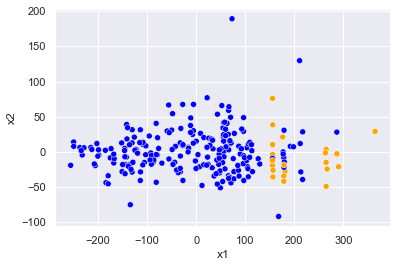

In [40]:
sns.scatterplot(x=X_PCA_test.x1, y=X_PCA_test.x2, c=y_PCA_test.map(color_map))

#### LDA model

In [41]:
lda = LinearDiscriminantAnalysis()
result = lda.fit(X_PCA_train, y_PCA_train)
y_PCA_predict = lda.predict(X_PCA_test)
print(f'Accuracy score: {result.score(X_PCA_test, y_PCA_test)}')
print(f'Average precision-recall score: {average_precision_score(y_PCA_test, y_PCA_predict)}')

Accuracy score: 0.9291666666666667
Average precision-recall score: 0.3647256728778468


##### Predicted

<AxesSubplot:xlabel='x1', ylabel='x2'>

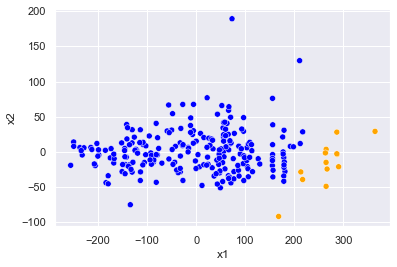

In [42]:
y_PCA_predict = pd.Series(data=lda.predict(X_PCA_test))
sns.scatterplot(x=X_PCA_test.x1, y=X_PCA_test.x2, c=y_PCA_predict.map(color_map))

#### Naive Bayes model

In [43]:
gnb = GaussianNB()
result = gnb.fit(X_PCA_train, y_PCA_train)
y_PCA_predict = gnb.predict(X_PCA_test)
print(f'Accuracy score: {result.score(X_PCA_test, y_PCA_test)}')
print(f'Average precision-recall score: {average_precision_score(y_PCA_test, y_PCA_predict)}')

Accuracy score: 0.9208333333333333
Average precision-recall score: 0.3259057971014493


##### Predicted

<AxesSubplot:xlabel='x1', ylabel='x2'>

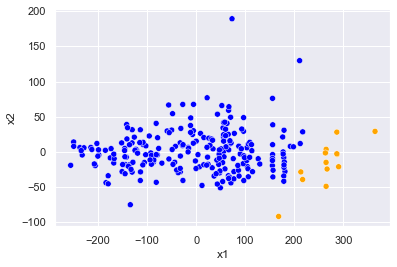

In [44]:
y_PCA_predict = pd.Series(data=lda.predict(X_PCA_test))
sns.scatterplot(x=X_PCA_test.x1, y=X_PCA_test.x2, c=y_PCA_predict.map(color_map))

#### QDA model

In [45]:
qda = QuadraticDiscriminantAnalysis()
result = qda.fit(X_PCA_train, y_PCA_train)
y_PCA_predict = qda.predict(X_PCA_test)
print(f'Accuracy score: {result.score(X_PCA_test, y_PCA_test)}')
print(f'Average precision-recall score: {average_precision_score(y_PCA_test, y_PCA_predict)}')

Accuracy score: 0.9208333333333333
Average precision-recall score: 0.3259057971014493


##### Predicted

<AxesSubplot:xlabel='x1', ylabel='x2'>

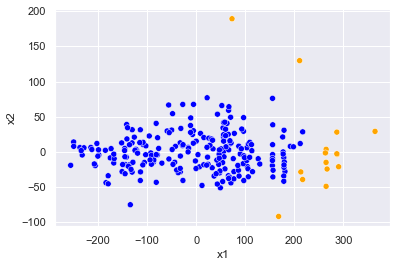

In [46]:
y_PCA_predict = pd.Series(data=qda.predict(X_PCA_test))
sns.scatterplot(x=X_PCA_test.x1, y=X_PCA_test.x2, c=y_PCA_predict.map(color_map))

### LDA transformed dataset

#### LDA model

##### Real

<AxesSubplot:xlabel='x1', ylabel='x2'>

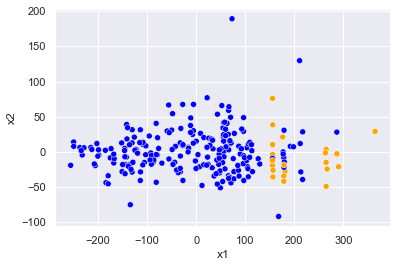

In [47]:
sns.scatterplot(x=X_LDA_test.x1, y=X_LDA_test.x2, c=y_LDA_test.map(color_map))

In [48]:
lda = LinearDiscriminantAnalysis()
result = lda.fit(X_LDA_train, y_LDA_train)
y_LDA_predict = lda.predict(X_LDA_test)
print(f'Accuracy score: {result.score(X_LDA_test, y_LDA_test)}')
print(f'Average precision-recall score: {average_precision_score(y_LDA_test, y_LDA_predict)}')

Accuracy score: 0.9291666666666667
Average precision-recall score: 0.3647256728778468


##### Predicted

<AxesSubplot:xlabel='x1', ylabel='x2'>

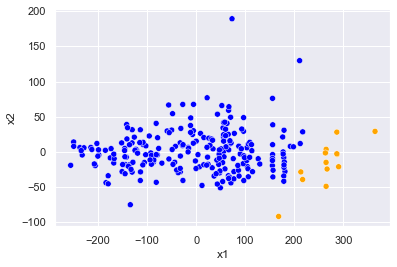

In [49]:
y_LDA_predict = pd.Series(data=lda.predict(X_LDA_test))
sns.scatterplot(x=X_LDA_test.x1, y=X_LDA_test.x2, c=y_LDA_predict.map(color_map))

#### Naive Bayes model

In [50]:
gnb = GaussianNB()
result = gnb.fit(X_LDA_train, y_LDA_train)
y_LDA_predict = gnb.predict(X_LDA_test)
print(f'Accuracy score: {result.score(X_LDA_test, y_LDA_test)}')
print(f'Average precision-recall score: {average_precision_score(y_LDA_test, y_LDA_predict)}')

Accuracy score: 0.9208333333333333
Average precision-recall score: 0.3259057971014493


##### Predicted

<AxesSubplot:xlabel='x1', ylabel='x2'>

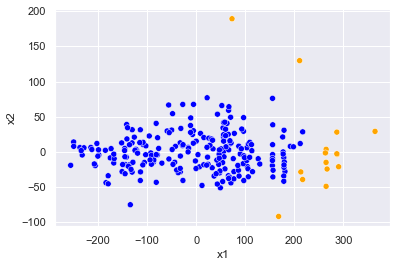

In [51]:
y_LDA_predict = pd.Series(data=gnb.predict(X_LDA_test))
sns.scatterplot(x=X_LDA_test.x1, y=X_LDA_test.x2, c=y_LDA_predict.map(color_map))

#### QDA model

In [52]:
qda = QuadraticDiscriminantAnalysis()
result = qda.fit(X_LDA_train, y_LDA_train)
y_LDA_predict = qda.predict(X_LDA_test)
print(f'Accuracy score: {result.score(X_LDA_test, y_LDA_test)}')
print(f'Average precision-recall score: {average_precision_score(y_LDA_test, y_LDA_predict)}')

Accuracy score: 0.9208333333333333
Average precision-recall score: 0.3259057971014493


##### Predicted

<AxesSubplot:xlabel='x1', ylabel='x2'>

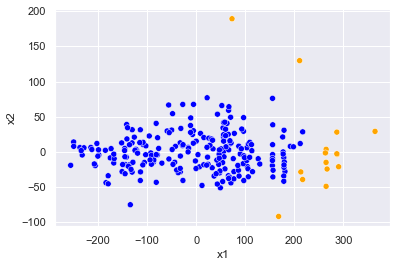

In [53]:
y_LDA_predict = pd.Series(data=qda.predict(X_LDA_test))
sns.scatterplot(x=X_LDA_test.x1, y=X_LDA_test.x2, c=y_LDA_predict.map(color_map))

### Playing with priors

Priors are assigned as the sorted order of the classes of the target. So the first number correlates to False, and the second to True.  
Source: [stackoverflow.com](https://stackoverflow.com/questions/20981374/how-do-i-know-what-priors-im-giving-to-sci-kit-learn-naive-bayes-classifiers)

In [54]:
order = sorted([True, False])
order

[False, True]

In [55]:
lda = LinearDiscriminantAnalysis(priors=[0.9, 0.1])
result = lda.fit(X_train, y_train)
y_predict = lda.predict(X_test)
print(f'Accuracy score: {result.score(X_test, y_test)}')
print(f'Average precision-recall score: {average_precision_score(y_test, y_predict)}')

Accuracy score: 0.9208333333333333
Average precision-recall score: 0.3422705314009662


The accuracy score is exactly the same as before, but the precision-recall score is slightly better.

In [56]:
lda = LinearDiscriminantAnalysis(solver='svd', priors=[0.9, 0.1])
result = lda.fit(X_train, y_train)
y_predict = lda.predict(X_test)
print(f'Accuracy score: {result.score(X_test, y_test)}')
print(f'Average precision-recall score: {average_precision_score(y_test, y_predict)}')

Accuracy score: 0.9208333333333333
Average precision-recall score: 0.3422705314009662


SVD solver shows no difference.

### Conclusion

Since the accuracy score is pretty similar between all the models, we cannot make much of a estimate on which is better.  
But since the target variable Legendary is most likely to be False, a model that just guesses False will yield a high accuracy, so this is a bad metric in this case.  
This is why we should use precision-recall score for binary prediction data, because it puts into account the probability of each class.  
And by this metric we can see that Naive Bayes for the original dataset gives the best score.